In [1]:
import pandas as pd
import os 

path = r'D:\elice_python\GAS_5\pytest_machine'

os.chdir(path)

In [2]:
data = pd.read_csv('cancer.csv', header=0)
data.shape

(569, 31)

In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, random_state=42)
train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign
287,12.9,13.1,81.9,516.0,0.0696,0.0373,0.0226,0.0117,0.134,0.0558,...,15.5,87.4,577.0,0.0962,0.115,0.119,0.0537,0.231,0.0692,1.0
512,13.4,20.5,88.6,557.0,0.1110,0.1470,0.1440,0.0817,0.212,0.0732,...,29.7,113.0,844.0,0.1570,0.386,0.511,0.2050,0.358,0.1110,0.0
402,13.0,18.3,84.2,525.0,0.0735,0.0790,0.0406,0.0188,0.187,0.0590,...,24.6,96.3,622.0,0.0933,0.232,0.160,0.0661,0.321,0.0725,1.0
446,17.8,28.0,117.0,982.0,0.1000,0.1310,0.1700,0.0829,0.171,0.0592,...,38.5,145.0,1440.0,0.1400,0.376,0.640,0.1970,0.297,0.0907,0.0
210,20.6,22.1,135.0,1290.0,0.0909,0.1350,0.1640,0.0956,0.176,0.0502,...,27.8,158.0,1660.0,0.1180,0.292,0.386,0.1920,0.291,0.0587,0.0


#### setup
- 모델 초기화를 위해 setup()을 수행한다.

In [4]:
from pycaret.classification import *

# 종속변수 지정
s = setup(train, target = 'benign')

,Description,Value
0,Session id,2405
1,Target,benign
2,Target type,Binary
3,Original data shape,"(426, 31)"
4,Transformed data shape,"(426, 31)"
5,Transformed train set shape,"(298, 31)"
6,Transformed test set shape,"(128, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [5]:
import sklearn
import pycaret

print(sklearn.__version__)
print(pycaret.__version__)


1.4.2
3.3.2


- scikit-learn 1.4.2
- pycaret 3.3.2

#### 모델 성능 비교
- pycaret이 가지고 있는 다양한 모델로 성능을 비교한다.

In [33]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9697,0.9939,0.9839,0.9692,0.9762,0.9343,0.9355,0.0250
ada,Ada Boost Classifier,0.9631,0.9931,0.9681,0.9742,0.9704,0.9213,0.9238,0.0240
qda,Quadratic Discriminant Analysis,0.9629,0.9951,0.9570,0.9833,0.9698,0.9217,0.9228,0.0070
lightgbm,Light Gradient Boosting Machine,0.9598,0.9917,0.9787,0.9597,0.9682,0.9132,0.9165,0.0610
ridge,Ridge Classifier,0.9597,0.9916,0.9944,0.9463,0.9692,0.9109,0.9156,0.0070
lr,Logistic Regression,0.9562,0.9917,0.9731,0.9579,0.9653,0.9059,0.9066,0.7280
xgboost,Extreme Gradient Boosting,0.9532,0.9901,0.9629,0.9636,0.9627,0.8998,0.9016,0.0190
rf,Random Forest Classifier,0.9530,0.9949,0.9681,0.9589,0.9630,0.8985,0.9004,0.0330
lda,Linear Discriminant Analysis,0.9530,0.9895,0.9944,0.9352,0.9637,0.8971,0.9015,0.0060
nb,Naive Bayes,0.9431,0.9914,0.9629,0.9484,0.9550,0.8776,0.8796,0.0070


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=2405, verbose=0,
                     warm_start=False)

#### 모델 생성
- 선택된 모델로 모델을 생성한다.
- 10-ford CV를 수행한다.

In [7]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9333,0.9904,0.9474,0.9474,0.9474,0.8565,0.8565
2,0.9667,0.9856,1.0000,0.9500,0.9744,0.9268,0.9293
3,0.9667,0.9856,1.0000,0.9500,0.9744,0.9268,0.9293
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9667,0.9928,0.9474,1.0000,0.9730,0.9296,0.9319
7,0.9667,1.0000,1.0000,0.9500,0.9744,0.9268,0.9293
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


#### 모델 성능 확인
- ROC-AUC와 Confusion Matrix 시각화도 지원한다.

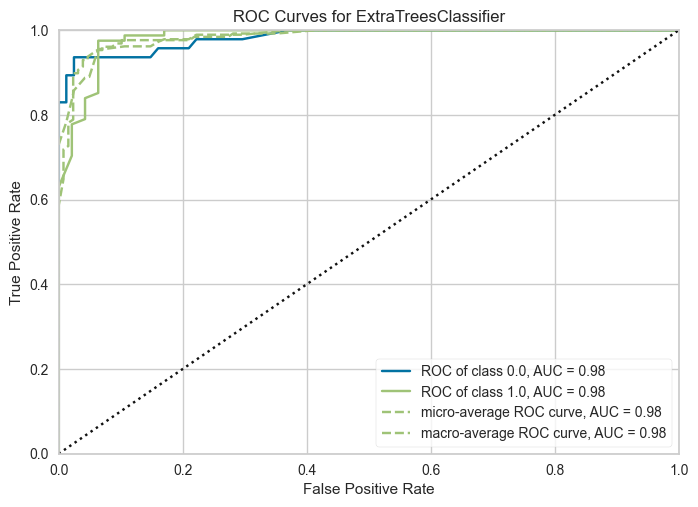

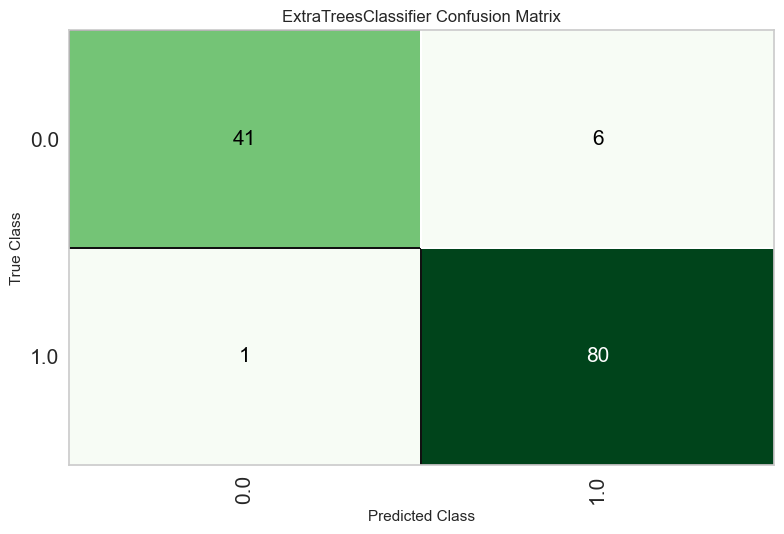

In [8]:
plot_model(estimator=et, plot='auc')
plot_model(estimator=et, plot='confusion_matrix')

#### Feature Importance 확인

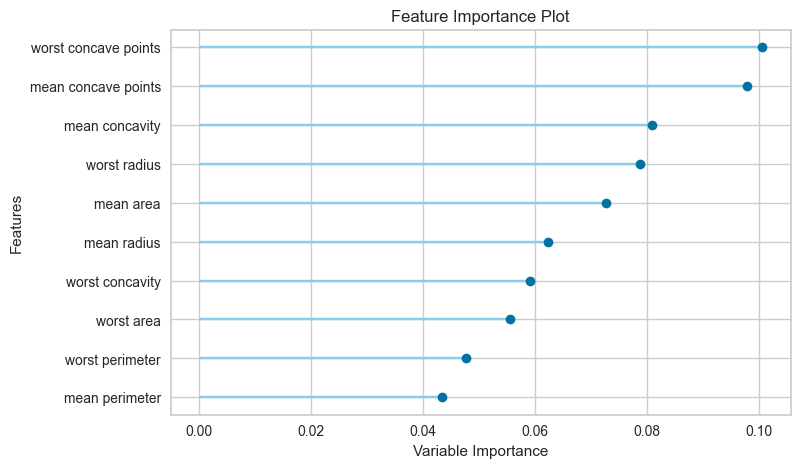

In [9]:
plot_model(estimator=et, plot='feature')

#### 모델 평가
- 모델의 성능에 대하여 다양한 평가 요소를 간단히 확인할 수 있게 한다.

In [10]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### 모델 저장

In [14]:
save_model(et, os.path.join(path,'models/best_caret_cancer_et'))

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['mean radius', 'mean texture',
                                              'mean perimeter', 'mean area',
                                              'mean smoothness',
                                              'mean compactness',
                                              'mean concavity',
                                              'mean concave points',
                                              'mean symmetry',
                                              'mean fractal dimension',
                                              'radius error', 'texture error',
                                              'perimeter error', 'area error',
                                              'smoothness error',
                                              'com...
                  ExtraTreesClassifier(

#### 저장된 모델 로딩

In [19]:
from pycaret.classification import load_model
loaded_model = load_model(os.path.join(path,'models/best_caret_cancer_et'))

Transformation Pipeline and Model Successfully Loaded


#### 예측
- 종속변수를 포함해 넣어주면 성능평가 결과를 출력한다

In [21]:
predict_model(loaded_model, test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9720,0.9965,0.9888,0.9670,0.9778,0.9401,0.9405


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign,prediction_label,prediction_score
204,12.500000,18.600000,81.099998,482.0,0.0997,0.1060,0.0800,0.0382,0.193,0.0637,...,678.0,0.143,0.238,0.2670,0.1020,0.301,0.0875,1.0,1,0.97
70,18.900000,21.299999,124.000000,1130.0,0.0901,0.1030,0.1080,0.0795,0.158,0.0546,...,1870.0,0.119,0.234,0.2690,0.1790,0.255,0.0659,0.0,0,1.00
131,15.500000,19.500000,102.000000,749.0,0.1090,0.1220,0.1470,0.0809,0.193,0.0580,...,1160.0,0.155,0.239,0.3790,0.1510,0.284,0.0802,0.0,0,0.92
431,12.400000,17.700001,81.500000,468.0,0.1050,0.1320,0.0774,0.0280,0.181,0.0710,...,516.0,0.145,0.263,0.2400,0.0737,0.256,0.0936,1.0,1,0.98
540,11.500000,14.400000,74.699997,403.0,0.0998,0.1120,0.0674,0.0259,0.182,0.0678,...,458.0,0.135,0.212,0.1800,0.0692,0.233,0.0813,1.0,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,14.600000,15.200000,95.800003,652.0,0.1130,0.1340,0.0997,0.0706,0.212,0.0635,...,804.0,0.128,0.309,0.2600,0.1400,0.315,0.0847,1.0,1,0.77
199,14.400000,20.200001,94.500000,643.0,0.0987,0.1210,0.1180,0.0598,0.195,0.0647,...,1040.0,0.155,0.406,0.4970,0.1840,0.475,0.1010,0.0,0,0.91
411,11.000000,16.799999,70.900002,373.0,0.1080,0.0780,0.0305,0.0248,0.171,0.0634,...,471.0,0.137,0.148,0.1070,0.0743,0.300,0.0788,1.0,1,1.00
18,19.799999,22.100000,130.000000,1260.0,0.0983,0.1030,0.1480,0.0950,0.158,0.0539,...,2400.0,0.151,0.315,0.5370,0.2390,0.277,0.0761,0.0,0,0.99


- 종속변수를 제외한 test 데이터를 넣으면 예측 라벨과 확률을 출력한다.

In [23]:
test2 = test.copy()
test2.drop('benign', axis=1, inplace=True)
predicts = predict_model(loaded_model,test2)
predicts

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,prediction_label,prediction_score
204,12.500000,18.600000,81.099998,482.0,0.0997,0.1060,0.0800,0.0382,0.193,0.0637,...,96.000000,678.0,0.143,0.238,0.2670,0.1020,0.301,0.0875,1,0.97
70,18.900000,21.299999,124.000000,1130.0,0.0901,0.1030,0.1080,0.0795,0.158,0.0546,...,166.000000,1870.0,0.119,0.234,0.2690,0.1790,0.255,0.0659,0,1.00
131,15.500000,19.500000,102.000000,749.0,0.1090,0.1220,0.1470,0.0809,0.193,0.0580,...,125.000000,1160.0,0.155,0.239,0.3790,0.1510,0.284,0.0802,0,0.92
431,12.400000,17.700001,81.500000,468.0,0.1050,0.1320,0.0774,0.0280,0.181,0.0710,...,89.599998,516.0,0.145,0.263,0.2400,0.0737,0.256,0.0936,1,0.98
540,11.500000,14.400000,74.699997,403.0,0.0998,0.1120,0.0674,0.0259,0.182,0.0678,...,78.800003,458.0,0.135,0.212,0.1800,0.0692,0.233,0.0813,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,14.600000,15.200000,95.800003,652.0,0.1130,0.1340,0.0997,0.0706,0.212,0.0635,...,109.000000,804.0,0.128,0.309,0.2600,0.1400,0.315,0.0847,1,0.77
199,14.400000,20.200001,94.500000,643.0,0.0987,0.1210,0.1180,0.0598,0.195,0.0647,...,118.000000,1040.0,0.155,0.406,0.4970,0.1840,0.475,0.1010,0,0.91
411,11.000000,16.799999,70.900002,373.0,0.1080,0.0780,0.0305,0.0248,0.171,0.0634,...,79.900002,471.0,0.137,0.148,0.1070,0.0743,0.300,0.0788,1,1.00
18,19.799999,22.100000,130.000000,1260.0,0.0983,0.1030,0.1480,0.0950,0.158,0.0539,...,187.000000,2400.0,0.151,0.315,0.5370,0.2390,0.277,0.0761,0,0.99


In [24]:
type(predicts)

pandas.core.frame.DataFrame

In [25]:
predict1 = predict_model(loaded_model, test)
type(predict1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9720,0.9965,0.9888,0.9670,0.9778,0.9401,0.9405


pandas.core.frame.DataFrame

In [28]:
print(predict1)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
204    12.500000     18.600000       81.099998      482.0           0.0997   
70     18.900000     21.299999      124.000000     1130.0           0.0901   
131    15.500000     19.500000      102.000000      749.0           0.1090   
431    12.400000     17.700001       81.500000      468.0           0.1050   
540    11.500000     14.400000       74.699997      403.0           0.0998   
..           ...           ...             ...        ...              ...   
89     14.600000     15.200000       95.800003      652.0           0.1130   
199    14.400000     20.200001       94.500000      643.0           0.0987   
411    11.000000     16.799999       70.900002      373.0           0.1080   
18     19.799999     22.100000      130.000000     1260.0           0.0983   
390    10.300000     12.200000       65.800003      322.0           0.1000   

     mean compactness  mean concavity  mean concave points  mea

In [30]:
predict1[predict1['prediction_label']!=predict1['benign']]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign,prediction_label,prediction_score
81,13.3,15.900000,86.500000,520.0,0.1080,0.1530,0.1170,0.0699,0.194,0.0690,...,615.0,0.154,0.479,0.486,0.1710,0.353,0.1020,1.0,0,0.75
73,13.8,15.800000,90.400002,584.0,0.1010,0.1280,0.0779,0.0507,0.166,0.0657,...,812.0,0.141,0.354,0.278,0.1380,0.259,0.1030,0.0,1,0.79
10,16.0,23.200001,103.000000,798.0,0.0821,0.0667,0.0330,0.0332,0.153,0.0570,...,1150.0,0.118,0.155,0.146,0.0998,0.295,0.0845,0.0,1,0.51
255,14.0,17.100000,91.400002,602.0,0.1100,0.1280,0.0979,0.0525,0.191,0.0613,...,826.0,0.151,0.326,0.321,0.1370,0.307,0.0796,0.0,1,0.73


In [31]:
predict1.sort_values(by='prediction_score').head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign,prediction_label,prediction_score
10,16.00,23.200001,103.000000,798.0,0.0821,0.0667,0.033,0.0332,0.153,0.0570,...,1150.0,0.1180,0.155,0.146,0.0998,0.295,0.0845,0.0,1,0.51
86,14.50,21.500000,94.300003,648.0,0.0944,0.0995,0.120,0.0494,0.207,0.0564,...,809.0,0.1310,0.198,0.335,0.1220,0.302,0.0685,0.0,0,0.54
68,9.03,17.299999,58.799999,251.0,0.1070,0.1410,0.313,0.0437,0.211,0.0805,...,325.0,0.1480,0.436,1.250,0.1750,0.423,0.1170,1.0,1,0.54
290,14.40,19.700001,96.000000,651.0,0.0876,0.1680,0.136,0.0660,0.171,0.0719,...,767.0,0.0998,0.247,0.222,0.1020,0.227,0.0880,1.0,1,0.55
39,13.50,20.799999,88.400002,559.0,0.1020,0.1260,0.106,0.0544,0.172,0.0642,...,740.0,0.1610,0.422,0.503,0.2260,0.281,0.1070,0.0,0,0.60
